In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from matplotlib.animation import FuncAnimation 

# Parcial 3: Métodos Computacionales
### Estudiantes: Andrés Hernández (201329363)    Francisco Díaz (201912252)

## 1. Cálculo de trayectoria para nave exploratoria lunar

In [2]:
# Primero definimos constantes que utilizaremos

w = 2.6617e-6
G = 6.67e-11
mt = 5.9736e24
rt = 6.3781e6
ml = 0.07349e24
rl = 1.7374e6 
d = 3.844e8
mu = ml/mt
delta = G*mt/(d**3)

In [3]:
# Ahora definimos las funciones correspondientes a las ecuaciones de movimiento del sistema

def f1(r, phi, pr, pphi, t):
    return pr

def f2(r, phi, pr, pphi, t):
    return pphi/(r**2)

def f3(r, phi, pr, pphi, t):
    rnorm = (1+(r**2)-(2*r*np.cos(phi - w*t)))**(1/2)
    c1 = (pphi**2)/(r**3)
    c2 = (1/r**2)+ (mu/(rnorm**3))*(r - np.cos(phi -w*t))
    return c1 -delta*c2

def f4(r, phi, pr, pphi, t):
    rnorm = (1+(r**2)-(2*r*np.cos(phi - w*t)))**(1/2)
    return -((delta*mu*r)/(rnorm**3))*np.sin(phi -w*t)

Func = [lambda r, phi, pr, pphi, t: f1(r, phi, pr, pphi, t),
        lambda r, phi, pr, pphi, t: f2(r, phi, pr, pphi, t),
        lambda r, phi, pr, pphi, t: f3(r, phi, pr, pphi, t),
        lambda r, phi, pr, pphi, t: f4(r, phi, pr, pphi, t)]

In [4]:
# Definimos las funciones correspondientes al método de Runge-Kutta 4

def GetRungeKutta4(Inicial, F,  h):

    r = np.zeros([Npoints])
    phi = np.zeros([Npoints])
    p_r = np.zeros([Npoints])
    p_phi = np.zeros([Npoints])

    r[0] = Inicial[0]
    phi[0] = Inicial[1]
    p_r[0] = Inicial[2]
    p_phi[0] = Inicial[3]
    
    K = np.zeros((4,4))
    t = 0
    for i in tqdm(range(1,Npoints)):
        
        for j in range(4):
            K[j][0] = h*F[j](r[i-1], phi[i-1], p_r[i-1], p_phi[i-1], t)
        for j in range(4):
            K[j][1] = h*F[j](r[i-1] +0.5*K[0][0], phi[i-1] +0.5*K[1][0], p_r[i-1] +0.5*K[2][0], p_phi[i-1] +0.5*K[3][0], t +h/2)
        for j in range(4):
            K[j][2] = h*F[j](r[i-1] +0.5*K[0][1], phi[i-1] +0.5*K[1][1], p_r[i-1] +0.5*K[2][1], p_phi[i-1] +0.5*K[3][1], t +h/2)
        for j in range(4):
            K[j][3] = h*F[j](r[i-1] +0.5*K[0][2], phi[i-1] +K[1][2], p_r[i-1] +K[2][2], p_phi[i-1] +K[3][2], t +h)
        
        r[i] = r[i-1] + (K[0][0]+2*K[0][1]+2*K[0][2]+K[0][3])/6.
        phi[i] = phi[i-1] + (K[1][0]+2*K[1][1]+2*K[1][2]+K[1][3])/6.
        p_r[i] = p_r[i-1] + (K[2][0]+2*K[2][1]+2*K[2][2]+K[2][3])/6.
        p_phi[i] = p_phi[i-1] + (K[3][0]+2*K[3][1]+2*K[3][2]+K[3][3])/6.
        
        t= t+h

    return [r, phi, p_r, p_phi]

In [5]:
# Ahora definimos la función que generara los valores correspondientes a las condiciones iniciales de la nave

def GetInicialValues():
    v = np.sqrt(2*G*mt/rt)
    dtheta = (0.042)*np.pi/180  # Ángulo que se debe varian en caso de cambiar el dt 
    # Mi trayectoria
    theta0, phi0 = (np.pi/4)*0.92 - dtheta, np.pi/3
    # Desde Cabo Cañaveral:
    #theta0, phi0 = 27.8*(np.pi/180) , (28.3941*np.pi/180) 
    r0 = rt
    x0 = r0*np.cos(phi0)
    y0 = r0*np.sin(phi0)
    vx0 = v*np.cos(theta0)
    vy0 = v*np.sin(theta0)

    pr0 = (x0*vx0 +y0*vy0)/(r0*d)
    pphi0 = (r0/d)*(v/d)*np.sin(theta0 -phi0)
    
    return [r0/d, phi0, pr0, pphi0]

In [6]:
# Definimos nuestra discretización e implementamos nuestros métodos

Tmin, Tmax, Npoints = 0.,600000., 240001
t = np.linspace(Tmin, Tmax, Npoints)
deltat = (Tmax-Tmin)/float(Npoints-1) # dt = 2.5 s
Inicial = GetInicialValues()
Y = GetRungeKutta4(Inicial, Func, deltat)

100%|██████████| 240000/240000 [01:12<00:00, 3331.64it/s]


In [7]:
# TEST: Método multipaso de Adams-Moulton (orden 4)

def GetAdams(y,t, f, deltat,orden):
    yc = y.copy()
    for j in range(4):
        for i in tqdm(range(orden,Npoints)):
            #A orden 4
            y[j][i] = y[j][i-1] + deltat*(1901.*f[j](y[0][i-1], y[1][i-1], y[2][i-1], y[3][i-1], t[i-1])-2774.*f[j](y[0][i-2], y[1][i-2], y[2][i-2], y[3][i-2], t[i-2])+2616.*f[j](y[0][i-3], y[1][i-3], y[2][i-3], y[3][i-3], t[i-3])-1274.*f[j](y[0][i-4], y[1][i-4], y[2][i-4], y[3][i-4], t[i-4])+251*f[j](y[0][i-5], y[1][i-5], y[2][i-5], y[3][i-5], t[i-5]))/720
            yc[j][i] = y[j][i]  
            yc[j][i] = yc[j][i-1] + deltat*(475.*f[j](yc[0][i], yc[1][i], yc[2][i], yc[3][i], t[i]) + 1427.*f[j](yc[0][i-1], yc[1][i-1], yc[2][i-1], yc[3][i-1], t[i-1])-798.*f[j](yc[0][i-2], yc[1][i-2], yc[2][i-2], yc[3][i-2], t[i-2])+482.*f[j](yc[0][i-3], yc[1][i-3], yc[2][i-3], yc[3][i-3], t[i-3])-173.*f[j](yc[0][i-4], yc[1][i-4], yc[2][i-4], yc[3][i-4], t[i-4])+27*f[j](yc[0][i-5], yc[1][i-5], yc[2][i-5], yc[3][i-5], t[i-5]))/1440
    return yc
#Yn = GetAdams(Y,t, Func, deltat,5)

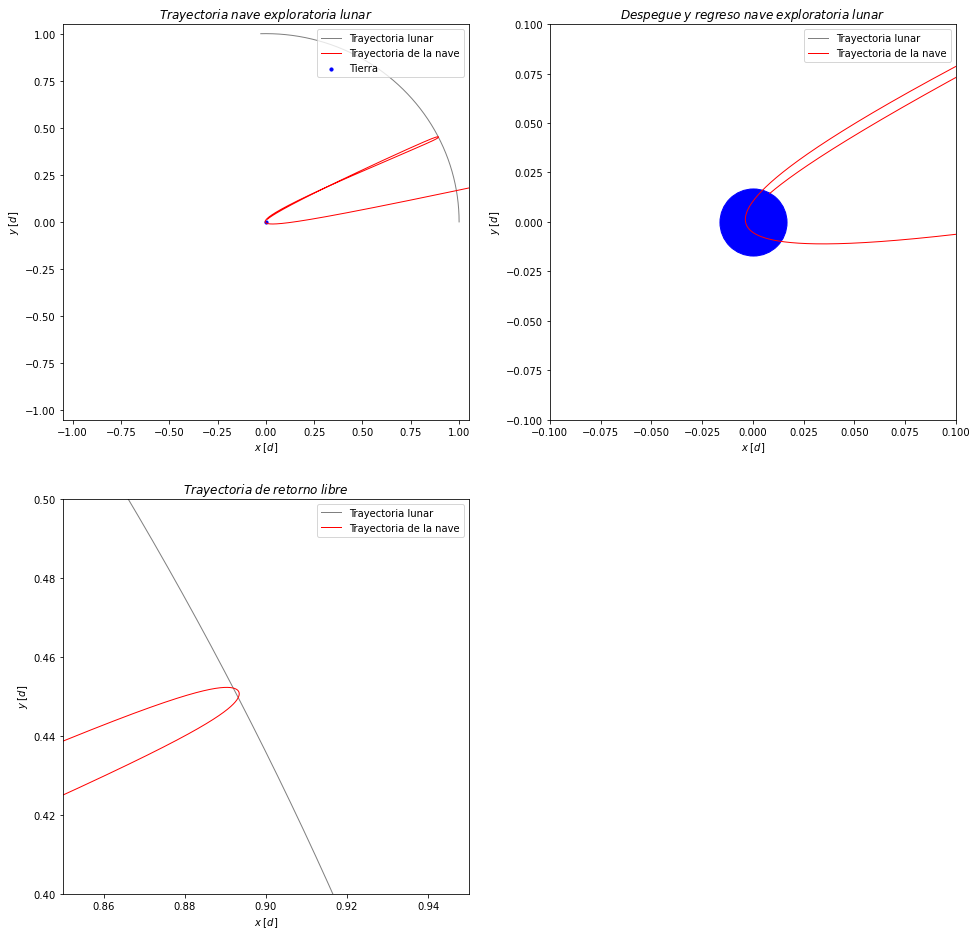

In [8]:
# Ahora graficamos las trayectorias del viaje lunar

XN, YN = Y[0]*np.cos(Y[1]), Y[0]*np.sin(Y[1])
XLuna, YLuna = np.cos(w*t), np.sin(w*t)
fig=plt.figure(figsize=(16,16))

ax1= fig.add_subplot(2,2,1)
ax1.scatter(0,0, s = 10, c = 'b', label = 'Tierra')
ax1.plot(XLuna, YLuna, linewidth  = 1, c = 'grey', label= 'Trayectoria lunar')
ax1.plot(XN, YN, linewidth  = 1 , c = 'r', label = 'Trayectoria de la nave')
ax1.set_xlabel('$x \; [d]$')
ax1.set_ylabel('$y \; [d]$')
ax1.set_xlim(-1.05,1.05)
ax1.set_ylim(-1.05,1.05)
ax1.legend(loc = 1)
ax1.set_title('$Trayectoria \; nave \; exploratoria \; lunar$')

ax1= fig.add_subplot(2,2,2)

ax1.plot(XLuna, YLuna, linewidth  = 1, c = 'grey', label= 'Trayectoria lunar')
ax1.plot(XN, YN, linewidth  = 1 , c = 'r', label = 'Trayectoria de la nave')
ax1.scatter(0,0, s = 4500, c = 'b')
ax1.set_xlabel('$x \; [d]$')
ax1.set_ylabel('$y \; [d]$')
ax1.set_xlim(-0.1,0.1)
ax1.set_ylim(-0.1,0.1)
ax1.legend(loc = 1)
ax1.set_title('$Despegue \; y \; regreso \; nave \; exploratoria \; lunar$')


ax1= fig.add_subplot(2,2,3)

ax1.plot(XLuna, YLuna, linewidth  = 1, c = 'grey', label= 'Trayectoria lunar')
ax1.plot(XN, YN, linewidth  = 1 , c = 'r', label = 'Trayectoria de la nave')
ax1.scatter(0,0, s = 4500, c = 'b')
ax1.set_xlabel('$x \; [d]$')
ax1.set_ylabel('$y \; [d]$')
ax1.set_xlim(0.85,0.95)
ax1.set_ylim(0.4,0.5)
ax1.legend(loc = 1)
ax1.set_title('$Trayectoria \; de \; retorno \; libre$')


plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


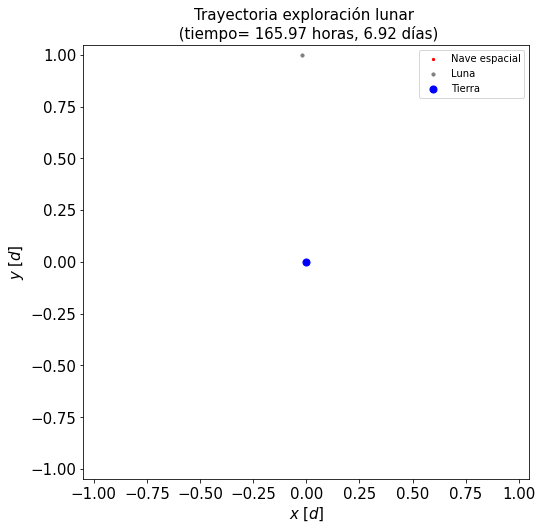

In [12]:
# Finalmente generamos la animación de la trayectoria de la nave exploratoria

fig=plt.figure(figsize=(8,8))
fs=15
ax1 = fig.add_subplot(111)
Frames = int(Npoints/1000)
def animate(k):
    ax1.clear()
    ax1.scatter(XN[k*1000], YN[k*1000], s = 5, c = 'r', label = 'Nave espacial')
    ax1.scatter(XLuna[k*1000], YLuna[k*1000], s = 10, c = 'grey', label = 'Luna')
    ax1.scatter(0,0, s = 50, c = 'b', label = 'Tierra')
    ax1.set_title("Trayectoria exploración lunar \n (tiempo= {} horas, {} días)".format(np.around((k*1000*deltat)/(3600), 2), np.around((k*1000*deltat)/(3600*24), 2)),fontsize=fs)
    ax1.set_xlim(-1.05,1.05)
    ax1.set_ylim(-1.05,1.05)
    ax1.set_xlabel("$x \; [d]$",fontsize=fs)
    ax1.set_ylabel("$y \; [d]$",fontsize=fs)
    ax1.legend(loc = 1)
    ax1.tick_params(labelsize=fs)
    
ani = FuncAnimation(fig, animate, frames= Frames,interval= 50)
ani.save('ExploracionLunar.gif', writer='imagemagick')